# Lorenz System

a)
https://science.howstuffworks.com/math-concepts/chaos-theory4.htm

I got some interesting information from the above site.

The Lorenz equations can model convection in a box, where the box is heated from below.

$\sigma$ is the ratio of fluid viscosity to fluid conductivity. $\rho$ represents $\Delta T$ between top and bottom of the box, and $\beta$ is the box's aspect ratio. These are fixed constants

x represents the convective flow, y represents the horizontal temperature distribution, and z represents the vertical temperature distribution. These are the dynamical variables that change over time.

b)
Iterating the differential equations. I used solve_ivp from scipy, which uses the Runge-Kutta method by default.

t = 0.00, x = 1.000, y = 1.000, z = 1.000
t = 0.24, x = 27.683, y = 47.161, z = 62.778
t = 0.48, x = -15.878, y = -15.312, z = 63.772
t = 0.72, x = -1.251, y = 0.116, z = 34.360
t = 0.96, x = -4.444, y = -10.060, z = 18.322
t = 1.20, x = -13.635, y = 11.187, z = 65.493
t = 1.44, x = 14.439, y = 17.589, z = 51.328
t = 1.68, x = 7.650, y = 6.559, z = 42.505
t = 1.92, x = 16.683, y = 19.087, z = 53.995
t = 2.16, x = 5.225, y = 4.037, z = 39.077


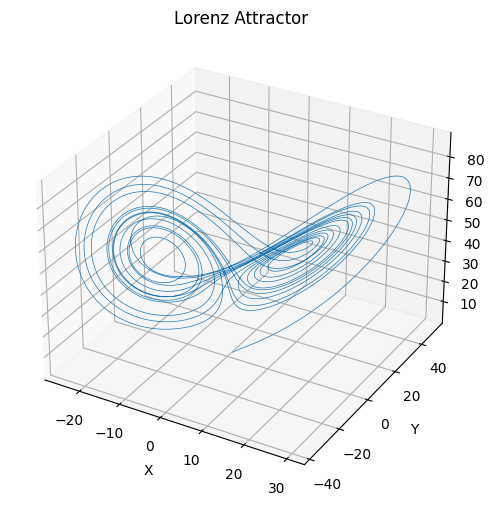

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the Lorenz system
def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z)
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10
rho = 48
beta = 3

# Initial condition
initial_state = [1.0, 1.0, 1.0]

# Time range
t_span = (0, 12)
t_eval = np.linspace(0, 12, 5000)  # High resolution for smooth curves

# Solve the system
solution = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval)

# Extract coordinates
x_vals, y_vals, z_vals = solution.y

# Store the coordinates in a list
data = list(zip(x_vals, y_vals, z_vals))

# Print the first few coordinates
for i in range(0,1000,100):
    print(f"t = {t_eval[i]:.2f}, x = {x_vals[i]:.3f}, y = {y_vals[i]:.3f}, z = {z_vals[i]:.3f}")

# Optional: Plot the attractor
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals, y_vals, z_vals, lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")
plt.show()

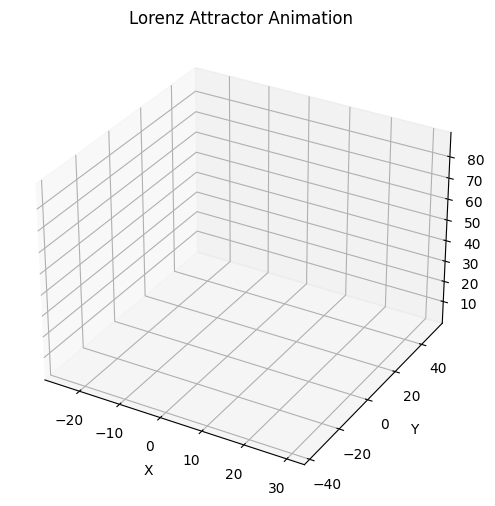

In [ ]:
#now generating a video


# Create the figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor Animation")

# Initialize the line object
line, = ax.plot([], [], [], lw=1)

skipnum = 50
# Animation function
def update(num):
    ax.clear()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Lorenz Attractor Animation")
    idx = num * skipnum  # Only update every 10th frame
    ax.plot(x_vals[:idx], y_vals[:idx], z_vals[:idx], lw=1)         #draw everything we've covered so far
    return ax,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(x_vals)//skipnum, interval=skipnum, blit=False)

# Save the animation
ani.save("lorenz_attractor.mp4", writer="ffmpeg")

5000
